## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.225704  0.081909  0.878266  0.088276  0.979738  0.362833
1 -0.918891  0.955017 -1.002634 -0.680712  1.577216  0.032374
2 -1.373735  0.352179  0.328855  0.204453 -0.721401 -1.122405
3 -0.518784 -1.518071 -1.592764 -0.150460 -1.579846 -0.880791
4 -0.003454  0.470789 -1.607957  1.084207 -0.649306  1.504513


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0137270	total: 68.6ms	remaining: 1m 8s
1:	learn: 1.0020482	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9900244	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9779002	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9670345	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9566080	total: 71.4ms	remaining: 11.8s
6:	learn: 0.9456062	total: 72ms	remaining: 10.2s
7:	learn: 0.9349532	total: 72.5ms	remaining: 8.99s
8:	learn: 0.9258377	total: 73.1ms	remaining: 8.05s
9:	learn: 0.9146189	total: 73.6ms	remaining: 7.29s
10:	learn: 0.9028936	total: 74.1ms	remaining: 6.66s
11:	learn: 0.8920515	total: 74.5ms	remaining: 6.13s
12:	learn: 0.8816233	total: 75ms	remaining: 5.69s
13:	learn: 0.8733043	total: 75.6ms	remaining: 5.32s
14:	learn: 0.8644414	total: 76ms	remaining: 4.99s
15:	learn: 0.8549089	total: 76.5ms	remaining: 4.7s
16:	learn: 0.8460510	total: 77ms	remaining: 4.45s
17:	learn: 0.8366345	total: 77.5ms	remaining: 4.23s
18:	learn: 0.8275164	total: 78ms	remaining: 4.03s
19:

83:	learn: 0.4351009	total: 110ms	remaining: 1.19s
84:	learn: 0.4312862	total: 110ms	remaining: 1.19s
85:	learn: 0.4271740	total: 111ms	remaining: 1.18s
86:	learn: 0.4236138	total: 111ms	remaining: 1.17s
87:	learn: 0.4206121	total: 112ms	remaining: 1.16s
88:	learn: 0.4174308	total: 112ms	remaining: 1.15s
89:	learn: 0.4141860	total: 113ms	remaining: 1.14s
90:	learn: 0.4103929	total: 113ms	remaining: 1.13s
91:	learn: 0.4067402	total: 114ms	remaining: 1.12s
92:	learn: 0.4028314	total: 114ms	remaining: 1.11s
93:	learn: 0.3992663	total: 114ms	remaining: 1.1s
94:	learn: 0.3957677	total: 115ms	remaining: 1.09s
95:	learn: 0.3919609	total: 115ms	remaining: 1.08s
96:	learn: 0.3884873	total: 116ms	remaining: 1.08s
97:	learn: 0.3852474	total: 116ms	remaining: 1.07s
98:	learn: 0.3818089	total: 117ms	remaining: 1.06s
99:	learn: 0.3780121	total: 117ms	remaining: 1.05s
100:	learn: 0.3752180	total: 117ms	remaining: 1.04s
101:	learn: 0.3719235	total: 118ms	remaining: 1.04s
102:	learn: 0.3690418	total: 1

249:	learn: 0.1254723	total: 188ms	remaining: 564ms
250:	learn: 0.1246876	total: 189ms	remaining: 563ms
251:	learn: 0.1236686	total: 189ms	remaining: 561ms
252:	learn: 0.1227619	total: 189ms	remaining: 559ms
253:	learn: 0.1217858	total: 190ms	remaining: 558ms
254:	learn: 0.1209008	total: 190ms	remaining: 556ms
255:	learn: 0.1199653	total: 191ms	remaining: 554ms
256:	learn: 0.1190132	total: 191ms	remaining: 552ms
257:	learn: 0.1183768	total: 192ms	remaining: 551ms
258:	learn: 0.1176236	total: 192ms	remaining: 549ms
259:	learn: 0.1170381	total: 192ms	remaining: 548ms
260:	learn: 0.1161581	total: 193ms	remaining: 547ms
261:	learn: 0.1153253	total: 194ms	remaining: 545ms
262:	learn: 0.1147783	total: 194ms	remaining: 544ms
263:	learn: 0.1141214	total: 195ms	remaining: 543ms
264:	learn: 0.1132974	total: 195ms	remaining: 542ms
265:	learn: 0.1126717	total: 196ms	remaining: 540ms
266:	learn: 0.1118569	total: 196ms	remaining: 539ms
267:	learn: 0.1110075	total: 197ms	remaining: 537ms
268:	learn: 

463:	learn: 0.0404517	total: 292ms	remaining: 338ms
464:	learn: 0.0403266	total: 293ms	remaining: 337ms
465:	learn: 0.0400833	total: 294ms	remaining: 336ms
466:	learn: 0.0399785	total: 294ms	remaining: 336ms
467:	learn: 0.0397497	total: 295ms	remaining: 335ms
468:	learn: 0.0394884	total: 295ms	remaining: 334ms
469:	learn: 0.0393478	total: 295ms	remaining: 333ms
470:	learn: 0.0389778	total: 296ms	remaining: 332ms
471:	learn: 0.0388407	total: 296ms	remaining: 332ms
472:	learn: 0.0385316	total: 297ms	remaining: 331ms
473:	learn: 0.0383968	total: 297ms	remaining: 330ms
474:	learn: 0.0382462	total: 298ms	remaining: 329ms
475:	learn: 0.0381139	total: 298ms	remaining: 328ms
476:	learn: 0.0379837	total: 299ms	remaining: 327ms
477:	learn: 0.0377412	total: 299ms	remaining: 327ms
478:	learn: 0.0376144	total: 300ms	remaining: 326ms
479:	learn: 0.0374044	total: 300ms	remaining: 325ms
480:	learn: 0.0372766	total: 301ms	remaining: 325ms
481:	learn: 0.0371511	total: 301ms	remaining: 324ms
482:	learn: 

628:	learn: 0.0201350	total: 370ms	remaining: 218ms
629:	learn: 0.0201037	total: 371ms	remaining: 218ms
630:	learn: 0.0200651	total: 371ms	remaining: 217ms
631:	learn: 0.0200343	total: 372ms	remaining: 216ms
632:	learn: 0.0199856	total: 372ms	remaining: 216ms
633:	learn: 0.0199143	total: 373ms	remaining: 215ms
634:	learn: 0.0198124	total: 373ms	remaining: 214ms
635:	learn: 0.0197646	total: 374ms	remaining: 214ms
636:	learn: 0.0196655	total: 374ms	remaining: 213ms
637:	learn: 0.0196290	total: 375ms	remaining: 212ms
638:	learn: 0.0195269	total: 375ms	remaining: 212ms
639:	learn: 0.0194291	total: 376ms	remaining: 211ms
640:	learn: 0.0193933	total: 376ms	remaining: 211ms
641:	learn: 0.0193240	total: 376ms	remaining: 210ms
642:	learn: 0.0192286	total: 377ms	remaining: 209ms
643:	learn: 0.0191609	total: 378ms	remaining: 209ms
644:	learn: 0.0190676	total: 378ms	remaining: 208ms
645:	learn: 0.0190014	total: 379ms	remaining: 207ms
646:	learn: 0.0189196	total: 379ms	remaining: 207ms
647:	learn: 

785:	learn: 0.0116571	total: 444ms	remaining: 121ms
786:	learn: 0.0116506	total: 445ms	remaining: 120ms
787:	learn: 0.0116410	total: 445ms	remaining: 120ms
788:	learn: 0.0115954	total: 446ms	remaining: 119ms
789:	learn: 0.0115504	total: 446ms	remaining: 119ms
790:	learn: 0.0115442	total: 446ms	remaining: 118ms
791:	learn: 0.0114997	total: 447ms	remaining: 117ms
792:	learn: 0.0114398	total: 447ms	remaining: 117ms
793:	learn: 0.0114148	total: 448ms	remaining: 116ms
794:	learn: 0.0114088	total: 448ms	remaining: 116ms
795:	learn: 0.0113655	total: 449ms	remaining: 115ms
796:	learn: 0.0113118	total: 449ms	remaining: 114ms
797:	learn: 0.0113024	total: 449ms	remaining: 114ms
798:	learn: 0.0112689	total: 450ms	remaining: 113ms
799:	learn: 0.0112204	total: 450ms	remaining: 113ms
800:	learn: 0.0111780	total: 451ms	remaining: 112ms
801:	learn: 0.0111679	total: 451ms	remaining: 111ms
802:	learn: 0.0111354	total: 452ms	remaining: 111ms
803:	learn: 0.0110957	total: 452ms	remaining: 110ms
804:	learn: 

954:	learn: 0.0072951	total: 522ms	remaining: 24.6ms
955:	learn: 0.0072707	total: 523ms	remaining: 24.1ms
956:	learn: 0.0072420	total: 523ms	remaining: 23.5ms
957:	learn: 0.0072227	total: 524ms	remaining: 23ms
958:	learn: 0.0071916	total: 524ms	remaining: 22.4ms
959:	learn: 0.0071685	total: 525ms	remaining: 21.9ms
960:	learn: 0.0071458	total: 525ms	remaining: 21.3ms
961:	learn: 0.0071179	total: 525ms	remaining: 20.8ms
962:	learn: 0.0070872	total: 526ms	remaining: 20.2ms
963:	learn: 0.0070594	total: 526ms	remaining: 19.6ms
964:	learn: 0.0070321	total: 527ms	remaining: 19.1ms
965:	learn: 0.0070132	total: 527ms	remaining: 18.6ms
966:	learn: 0.0069747	total: 527ms	remaining: 18ms
967:	learn: 0.0069524	total: 528ms	remaining: 17.4ms
968:	learn: 0.0069282	total: 528ms	remaining: 16.9ms
969:	learn: 0.0069066	total: 529ms	remaining: 16.3ms
970:	learn: 0.0068846	total: 529ms	remaining: 15.8ms
971:	learn: 0.0068633	total: 530ms	remaining: 15.3ms
972:	learn: 0.0068375	total: 530ms	remaining: 14.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

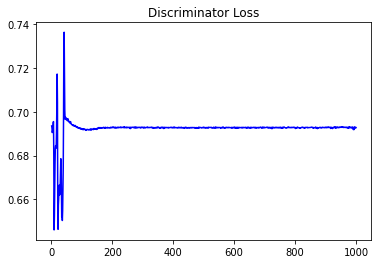

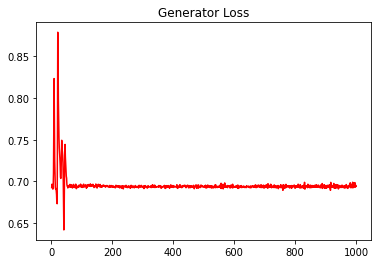

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05094951347915128


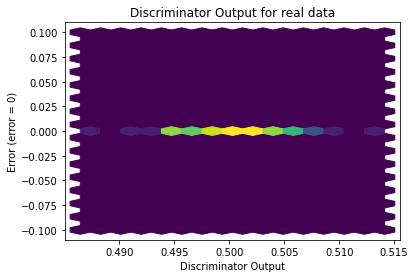

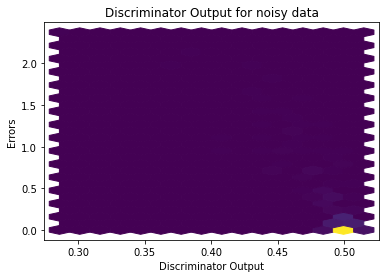

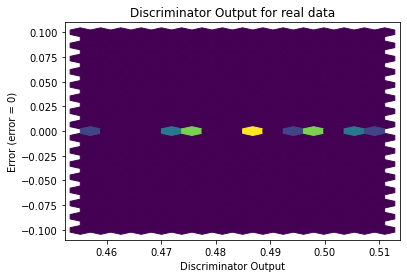

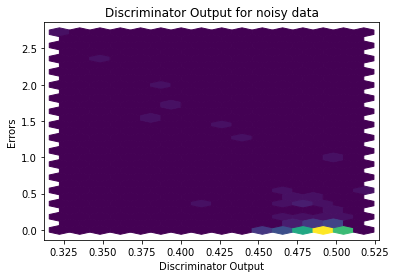

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


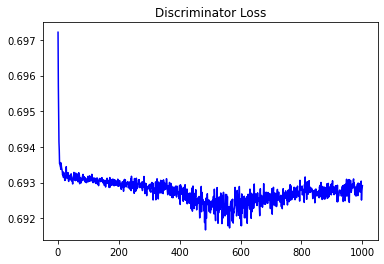

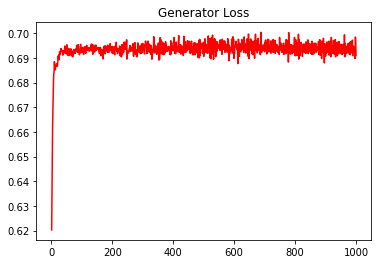

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04244699882592454


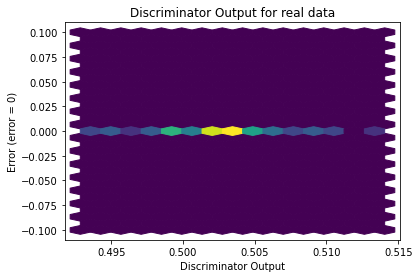

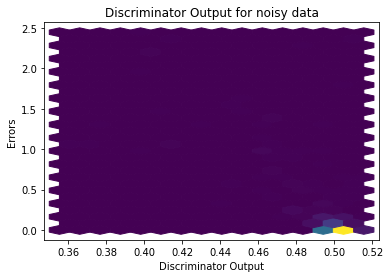

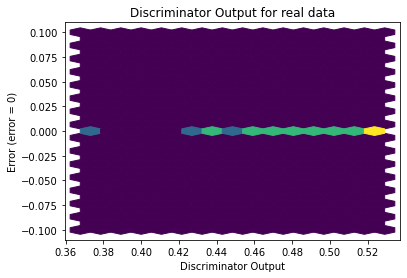

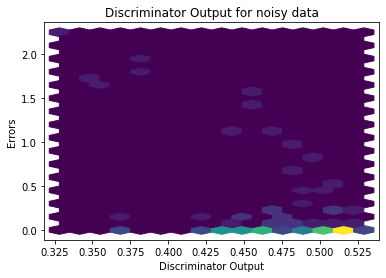

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1185]], requires_grad=True)
